# Linear Regression Multivariable

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv( 'ex1data2.txt' )
data_points = df.to_numpy()

In [3]:
X1 = data_points[:,:1]
X2 = data_points[:,1:2]
Y = data_points[:,2:]

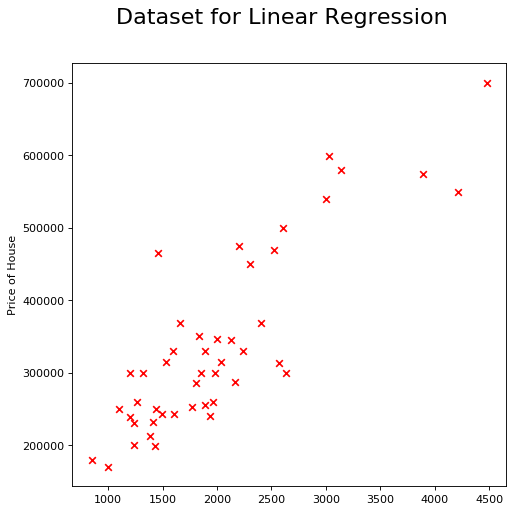

In [4]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Dataset for Linear Regression', fontsize=20)
plt.ylabel('Price of House', fontsize=10)
plt.scatter(X1,Y,  marker="x", color='red')

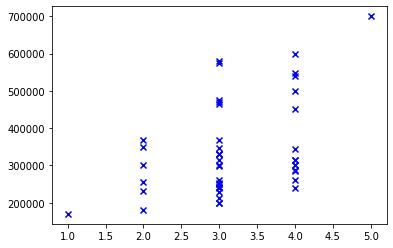

In [5]:
plt.scatter(X2,Y,  marker="x", color='blue')

In [6]:
def normalize(data):
    mean = sum(data)/len(data)
    sigma = np.sqrt( sum(np.square(data - mean))/(len(data)-1) )
    return (data - mean)/sigma

In [7]:
X1_normalized = normalize(X1)
X2_normalized = normalize(X2)
Y_normalized = normalize(Y)

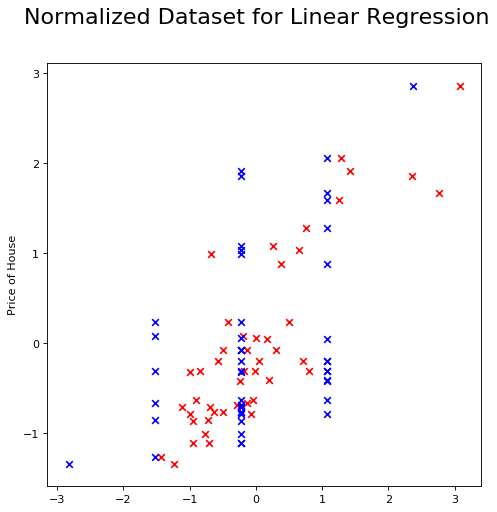

In [31]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Normalized Dataset for Linear Regression', fontsize=20)
plt.ylabel('Price of House', fontsize=10)
plt.scatter(X1_normalized,Y_normalized,  marker="x", color='red')
plt.scatter(X2_normalized,Y_normalized,  marker="x", color='blue')

In [14]:
m1 = 0
m2 = 0
c = 0

L = 0.0008  
epochs = 10000
n = float(len(X1_normalized))

cost_hist = []
theta_hist = []
pred_hist = []

for i in range(epochs): 

    y_hat = m1*X1_normalized+ m2*X2_normalized + c

    D_m1 = (-1/n) * sum(X1_normalized * (Y_normalized - y_hat))
    D_m2 = (-1/n) * sum(X2_normalized * (Y_normalized - y_hat))
    D_c = (-1/n) * sum(Y_normalized - y_hat)
    
    m1 = m1 - L * D_m1
    m2 = m2 - L * D_m2
    c = c - L * D_c
    
    cost_hist.append((1/(2*len(y_hat)))*np.sum( np.square(y_hat - Y_normalized) ))
    theta_hist.append([m1[0], m2[0],c[0]])
    pred_hist.append([[-3,3],[ (m1*3+  m2*3 + c)[0], (m1*-3+ m2*-3 + c)[0]]] )
    
theta_hist = np.asarray(theta_hist)
cost_hist = np.asarray(cost_hist)

In [15]:
m1, m2, c

(array([0.8689008]), array([-0.03488982]), array([6.46304266e-17]))

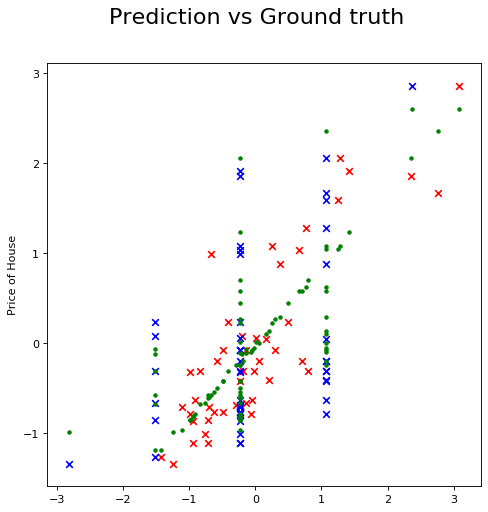

In [32]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Prediction vs Ground truth', fontsize=20)
plt.ylabel('Price of House', fontsize=10)
plt.scatter(X1_normalized,Y_normalized,  marker="x", color='red')
plt.scatter(X2_normalized,Y_normalized,  marker="x", color='blue')

plt.scatter([X1_normalized, X2_normalized], [m1*X1_normalized + m2*X2_normalized + c, m1*X1_normalized + m2*X2_normalized + c], marker=".", color='green')

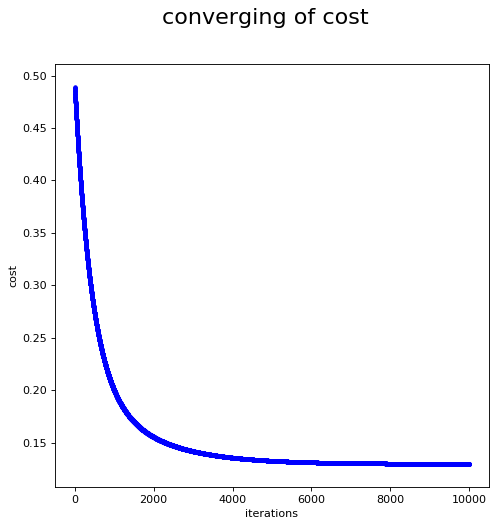

In [17]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('converging of cost', fontsize=20)
plt.xlabel('iterations', fontsize=10)
plt.ylabel('cost', fontsize=10)
plt.scatter([i for i in range(10000)], cost_hist, marker=".", color='blue')

# Normal equation
\begin{equation*}
\theta   = (X^T.X)^{-1}.X^T.Y
\end{equation*}

In [30]:
ones_for_bias = np.ones((X1_normalized.shape[0], 1))
X = np.hstack((X1_normalized, X2_normalized, ones_for_bias))
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y_normalized)
#m1, m2, c
theta

array([[ 8.83934632e-01],
       [-4.99195578e-02],
       [ 5.55111512e-17]])

# You can compare the parameters from Normal equation and via Gradient Descent (they are very close)